<a href="https://colab.research.google.com/github/uyenvybuile1502/CNN_hw/blob/main/face_recognition_in_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 24 images belonging to 4 classes.
Found 6 images belonging to 4 classes.


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,492 (56.61 MB)

 Trainable params: 14,839,492 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.2917 - loss: 1.4038 - val_accuracy: 0.5000 - val_loss: 1.4752
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4583 - loss: 1.8922 - val_accuracy: 0.3333 - val_loss: 1.3928
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.4583 - loss: 1.7166 - val_accuracy: 0.6667 - val_loss: 0.6383
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.4167 - loss: 0.8740 - val_accuracy: 0.6667 - val_loss: 0.8647
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.6667 - loss: 0.9610 - val_accuracy: 0.6667 - val_loss: 1.0704
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6250 - loss: 0.7632 - val_accuracy: 0.6667 - val_loss: 0.7477
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.7917 - loss: 0.5492 - val_accuracy: 0.8333 - val_loss: 0.3923
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7083 - loss: 0.6025 - val_accuracy: 0.8333 - val_loss: 0.4193
Epoch 9/20
1/1 ━

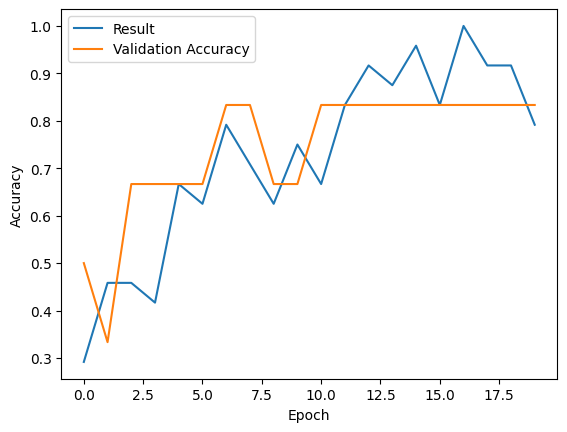

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Người tiên đoán: Bội Hoàn


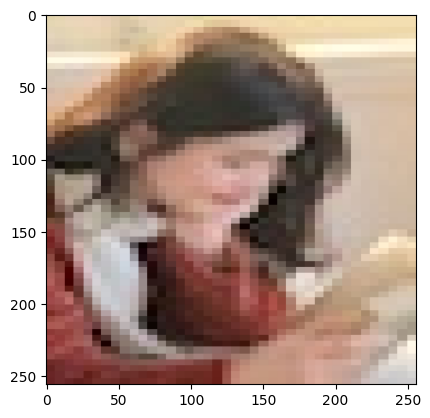

In [11]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
train_dir = "/content/drive/MyDrive/Faces"


img_width, img_height = 256,256
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.5,
    zoom_range=30,
    rotation_range=0.5,
    width_shift_range=0.5,
    height_shift_range=0.5,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


epochs = 20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


plt.plot(history.history['accuracy'], label="Result")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


path = "/content/drive/MyDrive/Faces/Uyên Vy/vy 8.jpeg"

img = load_img(path, target_size=(img_width, img_height))
plt.imshow(img)
img = np.array(img) / 255.0
img = img.reshape(1, 256, 256, 3)


prediction = np.argmax(model.predict(img), axis=-1)


class_labels = {v: k for k, v in train_generator.class_indices.items()}
person_name = class_labels[prediction[0]]
print(f"Người tiên đoán: {person_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Người tiên đoán: Bội Hoàn


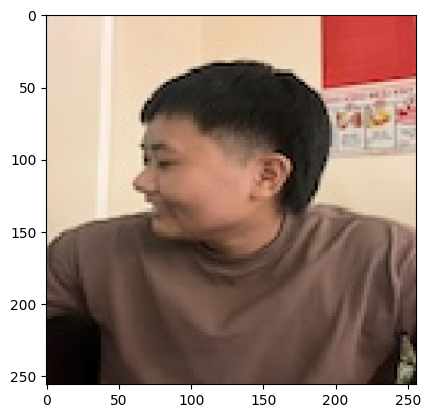

In [12]:
path = "/content/drive/MyDrive/Faces/Bội Hoàn/Hoàn 2.jpeg"

img = load_img(path, target_size=(img_width, img_height))
plt.imshow(img)
img = np.array(img) / 255.0
img = img.reshape(1, 256, 256, 3)


prediction = np.argmax(model.predict(img), axis=-1)


class_labels = {v: k for k, v in train_generator.class_indices.items()}
person_name = class_labels[prediction[0]]
print(f"Người tiên đoán: {person_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Người tiên đoán: Bội Hoàn


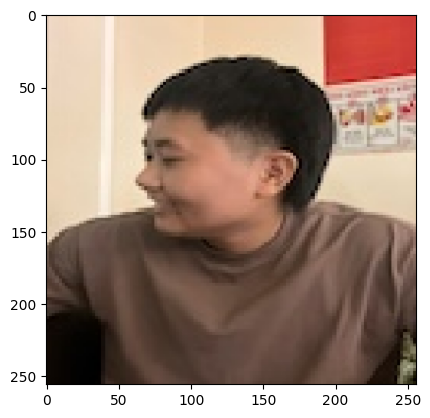

In [13]:
path = "/content/drive/MyDrive/Faces/Bội Hoàn/Hoàn 7.jpeg"

img = load_img(path, target_size=(img_width, img_height))
plt.imshow(img)
img = np.array(img) / 255.0
img = img.reshape(1, 256, 256, 3)


prediction = np.argmax(model.predict(img), axis=-1)


class_labels = {v: k for k, v in train_generator.class_indices.items()}
person_name = class_labels[prediction[0]]
print(f"Người tiên đoán: {person_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Người tiên đoán: Trung Hiếu


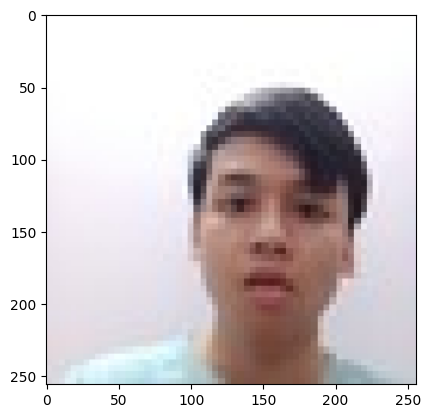

In [14]:
path = "/content/drive/MyDrive/Faces/Trung Hiếu/898a7b96-04ef-4d43-933c-d8abd0d43937.jpg"

img = load_img(path, target_size=(img_width, img_height))
plt.imshow(img)
img = np.array(img) / 255.0
img = img.reshape(1, 256, 256, 3)


prediction = np.argmax(model.predict(img), axis=-1)


class_labels = {v: k for k, v in train_generator.class_indices.items()}
person_name = class_labels[prediction[0]]
print(f"Người tiên đoán: {person_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Người tiên đoán: Trung Hiếu


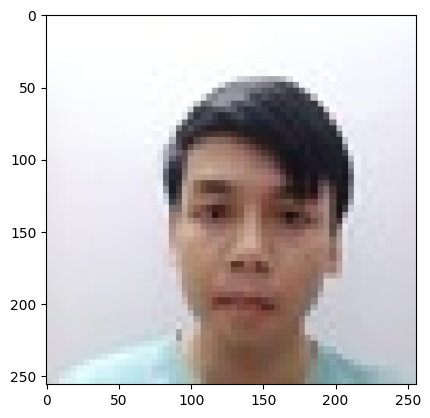

In [16]:
path = "/content/drive/MyDrive/Faces/Trung Hiếu/ade86523-5c00-45d6-8a25-5f013e182f59.jpg"

img = load_img(path, target_size=(img_width, img_height))
plt.imshow(img)
img = np.array(img) / 255.0
img = img.reshape(1, 256, 256, 3)


prediction = np.argmax(model.predict(img), axis=-1)


class_labels = {v: k for k, v in train_generator.class_indices.items()}
person_name = class_labels[prediction[0]]
print(f"Người tiên đoán: {person_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Người tiên đoán: Uyên Vy


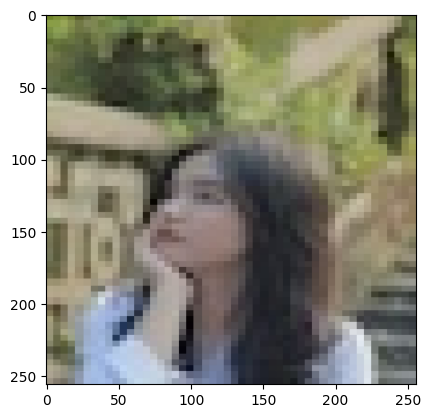

In [22]:
path = "/content/drive/MyDrive/Faces/Uyên Vy/vy 6.jpeg"
img = load_img(path, target_size=(img_width, img_height))
plt.imshow(img)
img = np.array(img) / 255.0
img = img.reshape(1, 256, 256, 3)


prediction = np.argmax(model.predict(img), axis=-1)


class_labels = {v: k for k, v in train_generator.class_indices.items()}
person_name = class_labels[prediction[0]]
print(f"Người tiên đoán: {person_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Người tiên đoán: Uyên Vy


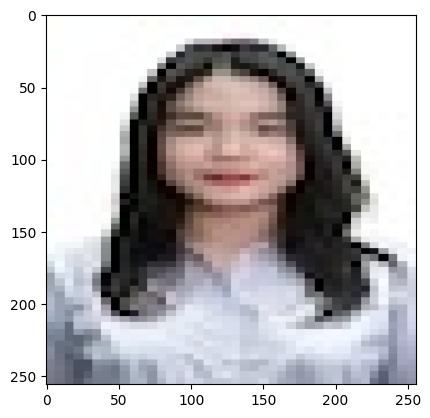

In [26]:
path = "/content/drive/MyDrive/Faces/Uyên Vy/vy 2.jpeg"

img = load_img(path, target_size=(img_width, img_height))
plt.imshow(img)
img = np.array(img) / 255.0
img = img.reshape(1, 256, 256, 3)


prediction = np.argmax(model.predict(img), axis=-1)


class_labels = {v: k for k, v in train_generator.class_indices.items()}
person_name = class_labels[prediction[0]]
print(f"Người tiên đoán: {person_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Người tiên đoán: Bội Hoàn


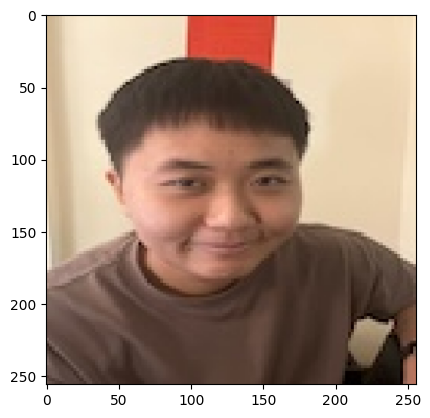

In [34]:
path = "/content/drive/MyDrive/Faces/Bội Hoàn/Hoàn 5.jpeg"

img = load_img(path, target_size=(img_width, img_height))
plt.imshow(img)
img = np.array(img) / 255.0
img = img.reshape(1, 256, 256, 3)


prediction = np.argmax(model.predict(img), axis=-1)


class_labels = {v: k for k, v in train_generator.class_indices.items()}
person_name = class_labels[prediction[0]]
print(f"Người tiên đoán: {person_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Người tiên đoán: Uyên Vy


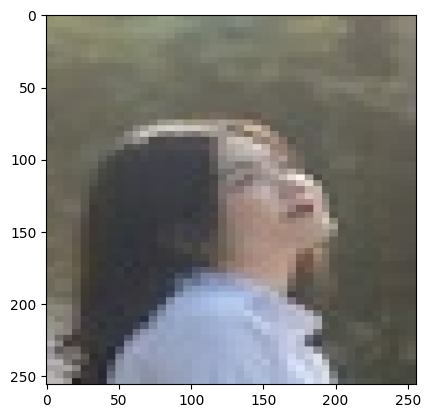

In [24]:
path = "/content/drive/MyDrive/Faces/Uyên Vy/vy 5.jpeg"

img = load_img(path, target_size=(img_width, img_height))
plt.imshow(img)
img = np.array(img) / 255.0
img = img.reshape(1, 256, 256, 3)


prediction = np.argmax(model.predict(img), axis=-1)


class_labels = {v: k for k, v in train_generator.class_indices.items()}
person_name = class_labels[prediction[0]]
print(f"Người tiên đoán: {person_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Người tiên đoán: Trung Hiếu


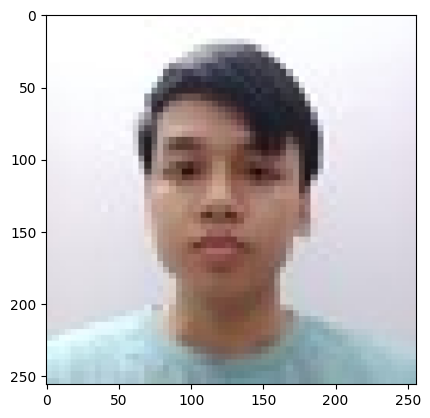

In [20]:
path = "/content/drive/MyDrive/Faces/Trung Hiếu/96c0bc23-c4c0-4e70-94d4-61487b986056.jpg"

img = load_img(path, target_size=(img_width, img_height))
plt.imshow(img)
img = np.array(img) / 255.0
img = img.reshape(1, 256, 256, 3)


prediction = np.argmax(model.predict(img), axis=-1)


class_labels = {v: k for k, v in train_generator.class_indices.items()}
person_name = class_labels[prediction[0]]
print(f"Người tiên đoán: {person_name}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')